<a href="https://colab.research.google.com/github/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<a href="https://colab.research.google.com/github.com/unique-subedi/stats604-project1/blob/main/604_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open notebook on Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import urllib.request
import collections
from statsmodels.stats.multitest import multipletests
import math
from sklearn.decomposition import PCA


## Make a dictionary of dataframes for each plate

In [2]:
plates = {}
j = 1
for i in range(510, 536):
  if(i != 518 and i != 527):
    url = "https://raw.githubusercontent.com/unique-subedi/stats604-project1/main/Data/LI8X00"+ str(i) +"_Level2.tsv"
    urllib.request.urlretrieve(url, "LI8X00"+ str(i) +"_Level2.tsv")
    plates["plate"+str(j)] = pd.read_csv("LI8X00"+ str(i) +"_Level2.tsv", sep = '\t')
    j += 1


In [3]:
print(plates.keys())


dict_keys(['plate1', 'plate2', 'plate3', 'plate4', 'plate5', 'plate6', 'plate7', 'plate8', 'plate9', 'plate10', 'plate11', 'plate12', 'plate13', 'plate14', 'plate15', 'plate16', 'plate17', 'plate18', 'plate19', 'plate20', 'plate21', 'plate22', 'plate23', 'plate24'])


In [ ]:
plates["plate1"].head()

,WellIndex,ArrayRow,ArrayColumn,Barcode,Well,Spot,PinDiameter,CellLineSet,CellLine,CellLineLx,CellLineAn,CellLineConc,CellLineConcUnit,CellLineTimeReact,CellLineTimeUnit,ECMSet,ECM1,ECM1Lx,ECM1An,ECM1Conc,ECM1ConcUnit,ECM2,ECM2Lx,ECM2An,ECM2Conc,ECM2ConcUnit,ECMTimeReact,ECMUnit,LigandSet,Ligand1,Ligand1Lx,Ligand1An,Ligand1Conc,Ligand1ConcUnit,Ligand1TimeReact,Ligand1TimeUnit,DrugSet,Drug1,Drug1Lx,Drug1An,Drug1Conc,Drug1ConcUnit,Drug1TimeReact,Drug1TimeUnit,StainingSet,395nm,395nmLx,488nm,488nmLx,555nm,555nmLx,640nm,640nmLx,750nm,750nmLx,EndpointDAPI,Endpoint488,Endpoint555,Endpoint647,Endpoint750,ECM3,ECMp,Ligand,MEP,Drug,MEP_Drug,PrintSpot,Spot_PA_Perimeter,Cells_CP_AreaShape_Area,Cells_CP_AreaShape_Compactness,Cells_CP_AreaShape_Eccentricity,Cells_CP_AreaShape_Extent,Cells_CP_AreaShape_FormFactor,Cells_CP_AreaShape_MajorAxisLength,Cells_CP_AreaShape_MaxFeretDiameter,Cells_CP_AreaShape_MaximumRadius,Cells_CP_AreaShape_MeanRadius,Cells_CP_AreaShape_MedianRadius,Cells_CP_AreaShape_MinFeretDiameter,Cells_CP_AreaShape_MinorAxisLength,Cells_CP_AreaShape_Orientation,Cells_CP_AreaShape_Perimeter,Cells_CP_AreaShape_Solidity,Cytoplasm_CP_AreaShape_Area,Cytoplasm_CP_AreaShape_Compactness,Cytoplasm_CP_AreaShape_Eccentricity,Cytoplasm_CP_AreaShape_Extent,Cytoplasm_CP_AreaShape_FormFactor,Cytoplasm_CP_AreaShape_MajorAxisLength,Cytoplasm_CP_AreaShape_MaxFeretDiameter,Cytoplasm_CP_AreaShape_MaximumRadius,Cytoplasm_CP_AreaShape_MeanRadius,Cytoplasm_CP_AreaShape_MedianRadius,Cytoplasm_CP_AreaShape_MinFeretDiameter,Cytoplasm_CP_AreaShape_MinorAxisLength,Cytoplasm_CP_AreaShape_Orientation,Cytoplasm_CP_AreaShape_Perimeter,Cytoplasm_CP_AreaShape_Solidity,Nuclei_CP_AreaShape_Area,Nuclei_CP_AreaShape_Compactness,Nuclei_CP_AreaShape_Eccentricity,Nuclei_CP_AreaShape_Extent,Nuclei_CP_AreaShape_FormFactor,Nuclei_CP_AreaShape_MajorAxisLength,Nuclei_CP_AreaShape_MaxFeretDiameter,Nuclei_CP_AreaShape_MaximumRadius,Nuclei_CP_AreaShape_MeanRadius,Nuclei_CP_AreaShape_MedianRadius,Nuclei_CP_AreaShape_MinFeretDiameter,Nuclei_CP_AreaShape_MinorAxisLength,Nuclei_CP_AreaShape_Orientation,Nuclei_CP_AreaShape_Perimeter,Nuclei_CP_AreaShape_Solidity,Cells_CP_Intensity_IntegratedIntensity_CellMask,Cells_CP_Intensity_IntegratedIntensity_KRT19,Cells_CP_Intensity_IntegratedIntensity_KRT5,Cells_CP_Intensity_MedianIntensity_CellMask,Cells_CP_Intensity_MedianIntensity_KRT19,Cells_CP_Intensity_MedianIntensity_KRT5,Cytoplasm_CP_Intensity_IntegratedIntensity_CellMask,Cytoplasm_CP_Intensity_IntegratedIntensity_Dapi,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5,Cytoplasm_CP_Intensity_MedianIntensity_CellMask,Cytoplasm_CP_Intensity_MedianIntensity_Dapi,Cytoplasm_CP_Intensity_MedianIntensity_KRT19,Cytoplasm_CP_Intensity_MedianIntensity_KRT5,Nuclei_CP_Intensity_IntegratedIntensity_Dapi,Nuclei_CP_Intensity_IntegratedIntensity_KRT19,Nuclei_CP_Intensity_IntegratedIntensity_KRT5,Nuclei_CP_Intensity_MedianIntensity_Dapi,Nuclei_CP_Intensity_MedianIntensity_KRT19,Nuclei_CP_Intensity_MedianIntensity_KRT5,Nuclei_PA_AreaShape_Neighbors,Nuclei_PA_Cycle_State,Cytoplasm_PA_Gated_KRT5Positive,Cytoplasm_PA_Gated_KRT19Positive,Cytoplasm_PA_Intensity_LineageRatio,Cytoplasm_PA_Gated_KRTClass,Spot_PA_SpotCellCount,Nuclei_PA_Cycle_DNA2NProportion,Nuclei_PA_Cycle_DNA4NProportion,Cytoplasm_PA_Gated_BasalLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalNegativeLuminalPositiveProportion,Cytoplasm_PA_Gated_BasalPositiveLuminalNegativeProportion,Cytoplasm_PA_Gated_BasalPositivedLuminalPositiveProportion,Cells_CP_Intensity_IntegratedIntensity_KRT19_SE,Cells_CP_Intensity_IntegratedIntensity_KRT5_SE,Cells_CP_Intensity_MedianIntensity_KRT19_SE,Cells_CP_Intensity_MedianIntensity_KRT5_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT19_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_KRT5_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT19_SE,Cytoplasm_CP_Intensity_MedianIntensity_KRT5_SE,Nuclei_CP_Intensity_IntegratedIntensity_KRT19_SE,Nuclei_CP_Intensity_IntegratedIn

## About the data
The column Ligand1 and the column ECMp represents the ligand and ECMPs used. For ligand, the value "FBS_pubchemsid56314508" is the control ligand because it appears in multiple plate within the staining set. We know from the lecture that "COL1" is the control ECMp.

In [4]:
unique_ligands = np.array([])
for i in range(1,9):
  p = plates["plate"+str(i)]
  unique_ligands = np.concatenate((unique_ligands,p["Ligand1"].unique()), axis = None)
print([item for item, count in collections.Counter(unique_ligands).items() if count > 1])



['FBS_pubchemsid56314508']


## Concatenate all the plates for a particular stain. 

In [5]:
stain1 = pd.concat([plates["plate1"],plates["plate2"], plates["plate3"],plates["plate4"],plates["plate5"],plates["plate6"],plates["plate7"],plates["plate8"]])
stain2 = pd.concat([plates["plate9"],plates["plate10"], plates["plate11"],plates["plate12"],plates["plate13"],plates["plate14"],plates["plate15"],plates["plate16"]])
stain3 = pd.concat([plates["plate17"],plates["plate18"], plates["plate19"],plates["plate20"],plates["plate21"],plates["plate22"],plates["plate23"],plates["plate24"]])

In [80]:
stain2.head()

,WellIndex,ArrayRow,ArrayColumn,Barcode,Well,Spot,PinDiameter,CellLineSet,CellLine,CellLineLx,CellLineAn,CellLineConc,CellLineConcUnit,CellLineTimeReact,CellLineTimeUnit,ECMSet,ECM1,ECM1Lx,ECM1An,ECM1Conc,ECM1ConcUnit,ECM2,ECM2Lx,ECM2An,ECM2Conc,ECM2ConcUnit,ECMTimeReact,ECMUnit,LigandSet,Ligand1,Ligand1Lx,Ligand1An,Ligand1Conc,Ligand1ConcUnit,Ligand1TimeReact,Ligand1TimeUnit,DrugSet,Drug1,Drug1Lx,Drug1An,Drug1Conc,Drug1ConcUnit,Drug1TimeReact,Drug1TimeUnit,StainingSet,395nm,395nmLx,488nm,488nmLx,555nm,555nmLx,640nm,640nmLx,750nm,750nmLx,EndpointDAPI,Endpoint488,Endpoint555,Endpoint647,Endpoint750,ECM3,ECMp,Ligand,MEP,Drug,MEP_Drug,PrintSpot,Spot_PA_Perimeter,Cells_CP_AreaShape_Area,Cells_CP_AreaShape_Compactness,Cells_CP_AreaShape_Eccentricity,Cells_CP_AreaShape_Extent,Cells_CP_AreaShape_FormFactor,Cells_CP_AreaShape_MajorAxisLength,Cells_CP_AreaShape_MaxFeretDiameter,Cells_CP_AreaShape_MaximumRadius,Cells_CP_AreaShape_MeanRadius,Cells_CP_AreaShape_MedianRadius,Cells_CP_AreaShape_MinFeretDiameter,Cells_CP_AreaShape_MinorAxisLength,Cells_CP_AreaShape_Orientation,Cells_CP_AreaShape_Perimeter,Cells_CP_AreaShape_Solidity,Cytoplasm_CP_AreaShape_Area,Cytoplasm_CP_AreaShape_Compactness,Cytoplasm_CP_AreaShape_Eccentricity,Cytoplasm_CP_AreaShape_Extent,Cytoplasm_CP_AreaShape_FormFactor,Cytoplasm_CP_AreaShape_MajorAxisLength,Cytoplasm_CP_AreaShape_MaxFeretDiameter,Cytoplasm_CP_AreaShape_MaximumRadius,Cytoplasm_CP_AreaShape_MeanRadius,Cytoplasm_CP_AreaShape_MedianRadius,Cytoplasm_CP_AreaShape_MinFeretDiameter,Cytoplasm_CP_AreaShape_MinorAxisLength,Cytoplasm_CP_AreaShape_Orientation,Cytoplasm_CP_AreaShape_Perimeter,Cytoplasm_CP_AreaShape_Solidity,Nuclei_CP_AreaShape_Area,Nuclei_CP_AreaShape_Compactness,Nuclei_CP_AreaShape_Eccentricity,Nuclei_CP_AreaShape_Extent,Nuclei_CP_AreaShape_FormFactor,Nuclei_CP_AreaShape_MajorAxisLength,Nuclei_CP_AreaShape_MaxFeretDiameter,Nuclei_CP_AreaShape_MaximumRadius,Nuclei_CP_AreaShape_MeanRadius,Nuclei_CP_AreaShape_MedianRadius,Nuclei_CP_AreaShape_MinFeretDiameter,Nuclei_CP_AreaShape_MinorAxisLength,Nuclei_CP_AreaShape_Orientation,Nuclei_CP_AreaShape_Perimeter,Nuclei_CP_AreaShape_Solidity,Cells_CP_Intensity_IntegratedIntensity_Actin,Cells_CP_Intensity_IntegratedIntensity_MitoTracker,Cells_CP_Intensity_MedianIntensity_Actin,Cells_CP_Intensity_MedianIntensity_MitoTracker,Cytoplasm_CP_Intensity_IntegratedIntensity_Actin,Cytoplasm_CP_Intensity_IntegratedIntensity_CellMask,Cytoplasm_CP_Intensity_IntegratedIntensity_Dapi,Cytoplasm_CP_Intensity_IntegratedIntensity_MitoTracker,Cytoplasm_CP_Intensity_MedianIntensity_Actin,Cytoplasm_CP_Intensity_MedianIntensity_CellMask,Cytoplasm_CP_Intensity_MedianIntensity_Dapi,Cytoplasm_CP_Intensity_MedianIntensity_MitoTracker,Nuclei_CP_Intensity_IntegratedIntensity_Dapi,Nuclei_CP_Intensity_MedianIntensity_Dapi,Nuclei_PA_AreaShape_Neighbors,Nuclei_PA_Cycle_State,Spot_PA_SpotCellCount,Nuclei_PA_Cycle_DNA2NProportion,Nuclei_PA_Cycle_DNA4NProportion,Cells_CP_Intensity_IntegratedIntensity_MitoTracker_SE,Cells_CP_Intensity_MedianIntensity_MitoTracker_SE,Cytoplasm_CP_Intensity_IntegratedIntensity_MitoTracker_SE,Cytoplasm_CP_Intensity_MedianIntensity_MitoTracker_SE,Spot_PA_SpotCellCount_SE,Nuclei_PA_Cycle_DNA2NProportion_SE,Spot_PA_ReplicateCount,Spot_PA_LoessSCC,QAScore,ImageID,ClarionID
0,1,1,1,LI8X00519,A01,1,350,MCF10AICBP43,MCF10A,LCL-2085,MCF10A_CVCL0598-ATCCOwn_CRL10317_ICBP43_0xnot|...,50000,cells_per_mL_uo0000201,3,day_uo0000033,ES3Layout2Set3-N02-None-A01,gelatin_chebi5291,LOR-1010,gelatin_chebi5291-Oregon_Green_488_UA-Molecula...,1.0,mg_per_mL_uo0000176,COL1_go0005584,COL1_Own,COL1_go0005584-CultrexOwn_344205001_31384J14,100.0,ug_per_mL_uo0000274,3,day_uo0000033,LS1Layout1Set3,EGF|1_P01133|1,EGF|1_P01133|1,EGF|1_P01133|1-RnDSystemsOwn_236EG200_HLM6614021,100.0,pg_per_mL_efo0004385,3,day_uo0000033,untreated,NaN,NaN,NaN,0,NaN,NaN,NaN,SS1Layout1Set1,DAPI_chebi51231,LSM-45203,phalloidin_chebi8040,LSM-45206,CellMask_Orange_Own,LOR-1011,mitoTracker_Deep_Red_633_chebi52131,LSM-45205

In [81]:
stain3.head()

,WellIndex,ArrayRow,ArrayColumn,Barcode,Well,Spot,PinDiameter,CellLineSet,CellLine,CellLineLx,CellLineAn,CellLineConc,CellLineConcUnit,CellLineTimeReact,CellLineTimeUnit,ECMSet,ECM1,ECM1Lx,ECM1An,ECM1Conc,ECM1ConcUnit,ECM2,ECM2Lx,ECM2An,ECM2Conc,ECM2ConcUnit,ECMTimeReact,ECMUnit,LigandSet,Ligand1,Ligand1Lx,Ligand1An,Ligand1Conc,Ligand1ConcUnit,Ligand1TimeReact,Ligand1TimeUnit,DrugSet,Drug1,Drug1Lx,Drug1An,Drug1Conc,Drug1ConcUnit,Drug1TimeReact,Drug1TimeUnit,StainingSet,395nm,395nmLx,488nm,488nmLx,555nm,555nmLx,640nm,640nmLx,750nm,750nmLx,EndpointDAPI,Endpoint488,Endpoint555,Endpoint647,Endpoint750,ECM3,ECMp,Ligand,MEP,Drug,MEP_Drug,PrintSpot,Spot_PA_Perimeter,Nuclei_CP_AreaShape_Area,Nuclei_CP_AreaShape_Compactness,Nuclei_CP_AreaShape_Eccentricity,Nuclei_CP_AreaShape_Extent,Nuclei_CP_AreaShape_FormFactor,Nuclei_CP_AreaShape_MajorAxisLength,Nuclei_CP_AreaShape_MaxFeretDiameter,Nuclei_CP_AreaShape_MaximumRadius,Nuclei_CP_AreaShape_MeanRadius,Nuclei_CP_AreaShape_MedianRadius,Nuclei_CP_AreaShape_MinFeretDiameter,Nuclei_CP_AreaShape_MinorAxisLength,Nuclei_CP_AreaShape_Orientation,Nuclei_CP_AreaShape_Perimeter,Nuclei_CP_AreaShape_Solidity,Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_0,Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_90,Nuclei_CP_Texture_Contrast_Fibrillarin_3_0,Nuclei_CP_Texture_Contrast_Fibrillarin_3_90,Nuclei_CP_Texture_Correlation_Fibrillarin_3_0,Nuclei_CP_Texture_Correlation_Fibrillarin_3_90,Nuclei_CP_Texture_DifferenceEntropy_Fibrillarin_3_0,Nuclei_CP_Texture_DifferenceEntropy_Fibrillarin_3_90,Nuclei_CP_Texture_DifferenceVariance_Fibrillarin_3_0,Nuclei_CP_Texture_DifferenceVariance_Fibrillarin_3_90,Nuclei_CP_Texture_Entropy_Fibrillarin_3_0,Nuclei_CP_Texture_Entropy_Fibrillarin_3_90,Nuclei_CP_Texture_InfoMeas1_Fibrillarin_3_0,Nuclei_CP_Texture_InfoMeas1_Fibrillarin_3_90,Nuclei_CP_Texture_InfoMeas2_Fibrillarin_3_0,Nuclei_CP_Texture_InfoMeas2_Fibrillarin_3_90,Nuclei_CP_Texture_InverseDifferenceMoment_Fibrillarin_3_0,Nuclei_CP_Texture_InverseDifferenceMoment_Fibrillarin_3_90,Nuclei_CP_Texture_SumAverage_Fibrillarin_3_0,Nuclei_CP_Texture_SumAverage_Fibrillarin_3_90,Nuclei_CP_Texture_SumEntropy_Fibrillarin_3_0,Nuclei_CP_Texture_SumEntropy_Fibrillarin_3_90,Nuclei_CP_Texture_SumVariance_Fibrillarin_3_0,Nuclei_CP_Texture_SumVariance_Fibrillarin_3_90,Nuclei_CP_Texture_Variance_Fibrillarin_3_0,Nuclei_CP_Texture_Variance_Fibrillarin_3_90,Nuclei_CP_Intensity_IntegratedIntensity_Dapi,Nuclei_CP_Intensity_IntegratedIntensity_EdU,Nuclei_CP_Intensity_IntegratedIntensity_Fibrillarin,Nuclei_CP_Intensity_MedianIntensity_Dapi,Nuclei_CP_Intensity_MedianIntensity_EdU,Nuclei_CP_Intensity_MedianIntensity_Fibrillarin,Nuclei_PA_AreaShape_Neighbors,Nuclei_PA_Cycle_State,Nuclei_PA_Gated_EdUPositive,Spot_PA_SpotCellCount,Nuclei_PA_Cycle_DNA2NProportion,Nuclei_PA_Cycle_DNA4NProportion,Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_0_SE,Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_90_SE,Nuclei_CP_Texture_Contrast_Fibrillarin_3_0_SE,Nuclei_CP_Texture_Contrast_Fibrillarin_3_90_SE,Nuclei_CP_Texture_Correlation_Fibrillarin_3_0_SE,Nuclei_CP_Texture_Correlation_Fibrillarin_3_90_SE,Nuclei_CP_Texture_DifferenceEntropy_Fibrillarin_3_0_SE,Nuclei_CP_Texture_DifferenceEntropy_Fibrillarin_3_90_SE,Nuclei_CP_Texture_DifferenceVariance_Fibrillarin_3_0_SE,Nuclei_CP_Texture_DifferenceVariance_Fibrillarin_3_90_SE,Nuclei_CP_Texture_Entropy_Fibrillarin_3_0_SE,Nuclei_CP_Texture_Entropy_Fibrillarin_3_90_SE,Nuclei_CP_Texture_InfoMeas1_Fibrillarin_3_0_SE,Nuclei_CP_Texture_InfoMeas1_Fibrillarin_3_90_SE,Nuclei_CP_Texture_InfoMeas2_Fibrillarin_3_0_SE,Nuclei_CP_Texture_InfoMeas2_Fibrillarin_3_90_SE,Nuclei_CP_Texture_InverseDifferenceMoment_Fibrillarin_3_0_SE,Nuclei_CP_Texture_InverseDifferenceMoment_Fibrillarin_3_90_SE,Nuclei_CP_Texture_SumAverage_Fibrillarin_3_0_SE,Nuclei_CP_Texture_SumAverage_Fibrillarin_3_90_SE,Nuclei_CP_Texture_SumEntropy_Fibrillarin_3_0_SE,Nuclei_CP_Texture_SumEntropy_Fibrillarin_3_90_SE,Nuclei_CP_Texture_SumVariance_Fibrillarin

## Summary statistic of the cell count for the first plate

In [6]:
df = plates["plate1"].loc[:, "PrintSpot":]
cell_count = df["Spot_PA_SpotCellCount"]
print(cell_count.describe())

count    5570.000000
mean       64.814901
std        25.831999
min         1.000000
25%        49.000000
50%        67.000000
75%        83.000000
max       149.000000
Name: Spot_PA_SpotCellCount, dtype: float64


## Density plot of the cell count for the first plate

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


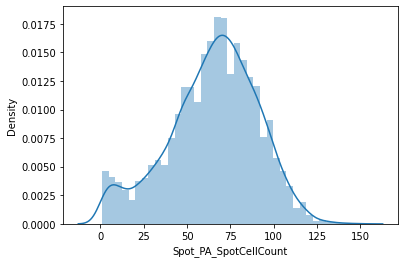

In [7]:
sns.distplot(cell_count)

## Mean of cell count for every combination of ECMP and Ligand for stain set 1

In [19]:
ecmp_ligand_1 = stain2.groupby(['ECMp', 'Ligand1'])
mu = ecmp_ligand_1.mean()["Spot_PA_SpotCellCount"]
median = ecmp_ligand_1.median()["Spot_PA_SpotCellCount"]
print("mean: \n ", mu)
print("Median: \n", median)

mean: 
  ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         136.800000
         ANGPT2|1_O15123|1         154.866667
         AREG_P15514               130.800000
         BMP2_P12643               128.133333
         BMP3_P12645               154.266667
                                      ...    
gelatin  TNF_P01375                 55.000000
         VEGFA|VEGF206_P15692|1     34.000000
         WNT10A_Q9GZT5              40.000000
         WNT3A|1_P56704|1           65.000000
         Wnt5a|1_P22725|1           45.000000
Name: Spot_PA_SpotCellCount, Length: 2850, dtype: float64
Median: 
 ECMp     Ligand1               
ALCAM|1  ANGPT1|1_Q15389|1         146.0
         ANGPT2|1_O15123|1         154.0
         AREG_P15514               134.0
         BMP2_P12643               131.0
         BMP3_P12645               159.0
                                   ...  
gelatin  TNF_P01375                 55.0
         VEGFA|VEGF206_P15692|1     34.0
         WNT10A_Q9GZT5   

The maximum median cell count is for the combination ('COL4', 'FGF2|3_P09038|2'), whereas the minimum is for the combination ('air', 'BMP4_P12644').

In [20]:
print(median.idxmax())
print(median.idxmin())

('FBN1', 'IGF1|1_P05019|1')
('air', 'ANGPT1|1_Q15389|1')


## Analysis of phenotypical properties of the combination of control ECMp and control Ligand for staining set 1.

The median cell count of the control group is 152.0 and the corresponding box plot is shown below.


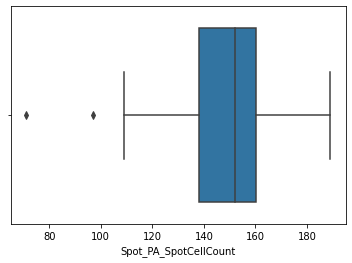

In [21]:
control_1 = ecmp_ligand_1.get_group(('COL1', 'FBS_pubchemsid56314508'))
sns.boxplot(x=control_1["Spot_PA_SpotCellCount"])
print("The median cell count of the control group is "+ str( control_1["Spot_PA_SpotCellCount"].median()) + " and the corresponding box plot is shown below.")

Let us compare the median cell count of the control group to that of the group with the highest and the lowest median cell count. 

The median cell count of the treatment group ('COL4', 'FGF2|3_P09038|2') is 145.0 and the corresponding box plot is shown below.


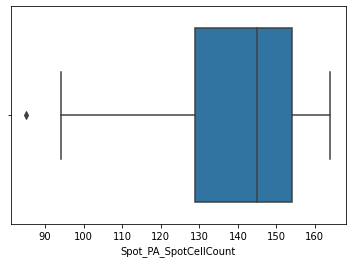

In [11]:
treatment_max  = ecmp_ligand_1.get_group(('COL4', 'FGF2|3_P09038|2'))
print("The median cell count of the treatment group ('COL4', 'FGF2|3_P09038|2') is "+ str( treatment_max["Spot_PA_SpotCellCount"].median()) + " and the corresponding box plot is shown below.")
sns.boxplot(x=treatment_max["Spot_PA_SpotCellCount"])


In [ ]:
treatment_min  = ecmp_ligand_1.get_group(('air', 'BMP4_P12644'))
treatment_min["Spot_PA_SpotCellCount"].describe()


count    4.0
mean     1.5
std      1.0
min      1.0
25%      1.0
50%      1.0
75%      1.5
max      3.0
Name: Spot_PA_SpotCellCount, dtype: float64

We observe that the median cell count of the treatment group ('air', 'BMP4_P12644') is 1, that of the control group ('COL1', 'FBS_pubchemsid56314508') is 76, and that of the treatment group ('COL4', 'FGF2|3_P09038|2') is 145.

Interestingly, if you repeat this analysis for all three staining cells, the ECMP value 'air' always has the lowest median cell count. However, the corresponding ligand changes across the staining cells.

## Two sample test between treatment and control groups

We use Anderson-Darling two sample test because it is non-parametric, distribution free, and works better for smaller sample size.

In [22]:
names = list(ecmp_ligand_1.groups)
p_values = []
for name, group in ecmp_ligand_1:
  result = stats.anderson_ksamp([control_1["Spot_PA_SpotCellCount"], group["Spot_PA_SpotCellCount"]], midrank = True)
  #print(len(group["Spot_PA_SpotCellCount"]))
  p_values.append(result[2])

idx = (np.isnan(p_values)-1)*-1
names = np.delete(names, idx, axis =0).tolist()
p_values = np.delete(p_values, idx)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: p-value floored: true value smaller than 0.001
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: p-value capped: true value larger than 0.25
  after removing the cwd from sys.path.


In [13]:
print(p_values)

[0.01840936 0.25       0.01085282 ... 0.10343342 0.13508668 0.0027894 ]


Since this is a multiple testing problem, we used Bonferroni-Holm adjustment to control FWER at 0.05.

In [ ]:
results = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
insignificant_indices = np.nonzero((results[0]-1)*(-1))
names_reject = np.delete(names, insignificant_indices, axis =0).tolist()
pvalues_reject = np.delete(p_values, insignificant_indices)
significant_ecmps = np.asarray(np.unique(np.array(names_reject)[:, 0], return_counts = True)).T
significant_ligands = np.asarray(np.unique(np.array(names_reject)[:, 1], return_counts = True)).T
print(significant_ecmps)
print(significant_ligands)


In [24]:
print(len(names_reject))

818


When you look at all significant combinations for spot cell counts, the ECMps that appear frequently are 'air', which is significant in all its 56 treatments, 'N1D1|1' that is significant 47 times and 'ELN|3' that is significant 25 times. Similarly, the ligand 'BMP5|1_P22003|1' is significant 44 times whereas 'CSF2_P04141' is significant 49 times and 'PTN_P21246' repeats 15 times.

## Anderson-Darling Test

In [25]:
AD_spot_cell_count = stats.anderson_ksamp([stain1["Spot_PA_SpotCellCount"],stain2["Spot_PA_SpotCellCount"]], midrank = True )
print(AD_spot_cell_count)

Anderson_ksampResult(statistic=33724.36098275931, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


In [33]:
AD_nuclei = stats.anderson_ksamp([stain1["Cells_CP_AreaShape_Area"],stain2["Cells_CP_AreaShape_Area"]], midrank = True )
print(AD_nuclei)

Anderson_ksampResult(statistic=34457.849705639936, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.


This shows that the spot cell counts in stain set 1 and stain set 3 comes has different distributions. Thus, the staining is definitely affecting the cell counts.

In [263]:
def significant_ecmp_ligand(df):
    ecmp_ligand = df.groupby(['ECMp', 'Ligand1'])
    control = ecmp_ligand.get_group(('COL1', 'FBS_pubchemsid56314508'))
    names = list(ecmp_ligand.groups)
    p_values = []
    for name, group in ecmp_ligand:
      result = stats.anderson_ksamp([control["cell_count"], group["cell_count"]], midrank = True)
      p_values.append(result[2])

    idx = (np.isnan(p_values)-1)*-1
    names = np.delete(names, idx, axis =0).tolist()
    p_values = np.delete(p_values, idx)

    results = multipletests(p_values, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
    insignificant_indices = np.nonzero((results[0]-1)*(-1))
    names_reject = np.delete(names, insignificant_indices, axis =0).tolist()
    pvalues_reject = np.delete(p_values, insignificant_indices)
    significant_ecmps = np.asarray(np.unique(np.array(names_reject)[:, 0], return_counts = True)).T
    significant_ligands = np.asarray(np.unique(np.array(names_reject)[:, 1], return_counts = True)).T
    return significant_ecmps, significant_ligands


## Stain Set 1

### Structural features of cells

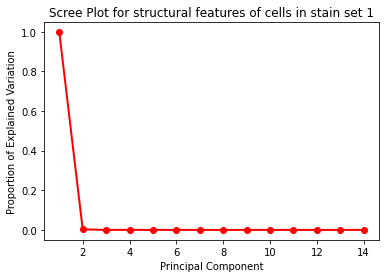

Explained variation of the first component: 0.9971254600814751


In [201]:
cell_structural_1 = stain1.loc[:,"Cells_CP_AreaShape_Area": "Cells_CP_AreaShape_Solidity" ]
cell_structural_1.fillna(cell_structural_1.mean())
c = cell_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cell_structural_1)
projected_cell_structural_1 = pca.transform(cell_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cells in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural features of cytoplasm

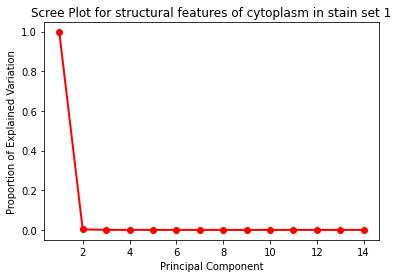

Explained variation of the first component: 0.99701366609593


In [202]:
cytoplasm_structural_1 = stain1.loc[:, "Cytoplasm_CP_AreaShape_Area":"Cytoplasm_CP_AreaShape_Solidity"]
c = cytoplasm_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cytoplasm_structural_1)
projected_cytoplasm_structural_1 = pca.transform(cytoplasm_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cytoplasm in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural feature of nuclei 

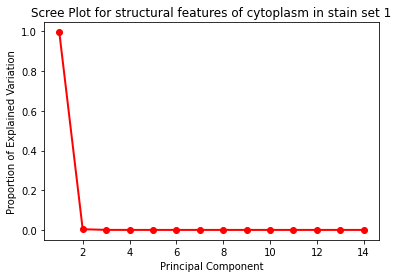

Explained variation of the first component: 0.9962520546495124


In [149]:
nuclei_structural_1 = stain1.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_1.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_1)
projected_nuclei_structural_1 = pca.transform(nuclei_structural_1)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 1')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Dataset of four variables





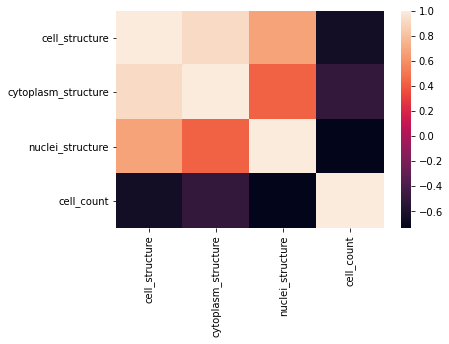

In [239]:
df1 = pd.DataFrame(np.array([projected_cell_structural_1, projected_cytoplasm_structural_1, projected_nuclei_structural_1, stain1["Spot_PA_SpotCellCount"].values])).T
df1.columns = ["cell_structure", "cytoplasm_structure", 'nuclei_structure', 'cell_count']
df1.corr(method ="spearman")


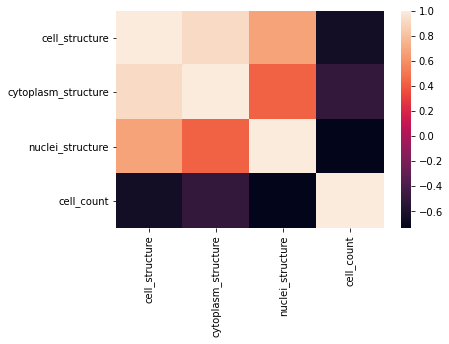

In [240]:
#numeric1 = df1.loc[:,:"cell_count"]
sns.heatmap(df1.corr(method = "spearman"))

## ECMP-Ligand Analysis

In [267]:
df1["ECMp"] = stain1["ECMp"].values
df1["Ligand1"] = stain1["Ligand1"].values
sig_ecmp, sig_ligand= significant_ecmp_ligand(df1)
print(sig_ecmp, sig_ligand)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value capped: true value larger than 0.25
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: p-value floored: true value smaller than 0.001
  import sys


[['ALCAM|1' '5']
 ['BCAN|1' '3']
 ['BGN' '5']
 ['CD44|1' '5']
 ['CDH15' '5']
 ['CDH1|1' '3']
 ['CDH20' '5']
 ['CDH3|1' '4']
 ['CDH6|1' '3']
 ['CDH8' '4']
 ['CEACAM6' '5']
 ['COL1' '4']
 ['COL23A1|1' '4']
 ['COL2A1|2' '6']
 ['COL3A1|1' '6']
 ['COL4' '9']
 ['COL5A1' '11']
 ['DCN|A' '4']
 ['DSG2' '6']
 ['ECM1|1' '10']
 ['ELN|3' '25']
 ['FBN1' '8']
 ['FN1|1' '3']
 ['GAP43|1' '5']
 ['HA<500kDa' '2']
 ['HA>500kDa' '5']
 ['ICAM1' '7']
 ['ITGA10B1' '5']
 ['ITGA2B1' '5']
 ['ITGA3B1' '4']
 ['ITGA4B1' '3']
 ['ITGA6B4' '3']
 ['ITGA9B1' '6']
 ['ITGAMB2' '5']
 ['ITGAVB6' '5']
 ['LAMB1' '4']
 ['LUM' '10']
 ['Laminin3B32' '4']
 ['NID1|1' '47']
 ['OMD' '4']
 ['PECAM1|Long' '7']
 ['POSTN|1' '5']
 ['SPARC' '8']
 ['SPP1|A' '2']
 ['THBS1|1' '3']
 ['TNC|1' '3']
 ['VCAM1|1' '4']
 ['VTN' '3']
 ['air' '56']
 ['gelatin' '6']] [['ANGPT1|1_Q15389|1' '4']
 ['ANGPT2|1_O15123|1' '6']
 ['AREG_P15514' '3']
 ['BMP2_P12643' '6']
 ['BMP3_P12645' '3']
 ['BMP4_P12644' '4']
 ['BMP5|1_P22003|1' '44']
 ['BMP6_P22004' '14']
 [

## Stain cell 2

### Structural features of cells

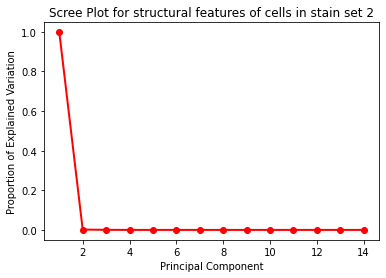

Explained variation of the first component: 0.9977245207920994


In [163]:
cell_structural_2 = stain2.loc[:,"Cells_CP_AreaShape_Area": "Cells_CP_AreaShape_Solidity" ]
c = cell_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cell_structural_2)
projected_cell_structural_2 = pca.transform(cell_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cells in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural features of cytoplasm

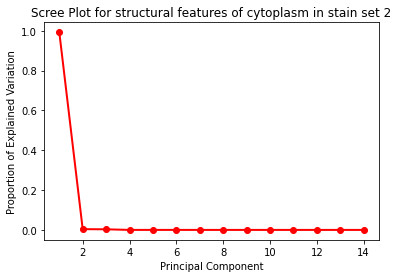

Explained variation of the first component: 0.9928789421257035


In [164]:
cytoplasm_structural_2 = stain2.loc[:, "Cytoplasm_CP_AreaShape_Area":"Cytoplasm_CP_AreaShape_Solidity"]
c = cytoplasm_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(cytoplasm_structural_2)
projected_cytoplasm_structural_2 = pca.transform(cytoplasm_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of cytoplasm in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Structural features of nuclei

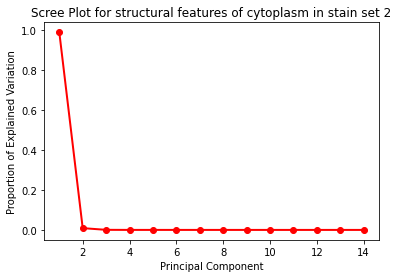

Explained variation of the first component: 0.9905250453318581


In [165]:
nuclei_structural_2 = stain2.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_2.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_2)
projected_nuclei_structural_2 = pca.transform(nuclei_structural_2)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 2')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Stainset 2 with four variables 

In [170]:
df2 = pd.DataFrame(np.array([projected_cell_structural_2, projected_cytoplasm_structural_2, projected_nuclei_structural_2, stain2["Spot_PA_SpotCellCount"].values])).T
df2.columns = ["cell_structure", "cytoplasm_structure", 'nuclei_structure', 'cell_count']
df2.corr(method = "spearman")

,cell_structure,cytoplasm_structure,nuclei_structure,cell_count
cell_structure,1.000000,0.899118,0.858409,-0.632121
cytoplasm_structure,0.899118,1.000000,0.704607,-0.544414
nuclei_structure,0.858409,0.704607,1.000000,-0.622740
cell_count,-0.632121,-0.544414,-0.622740,1.000000


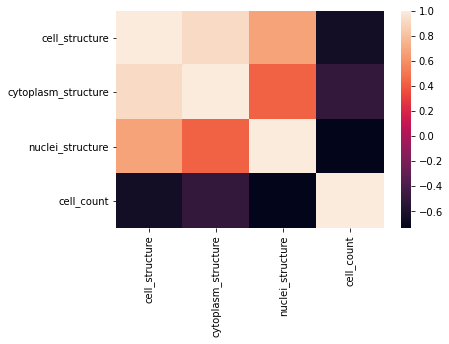

In [171]:
sns.heatmap(df1.corr(method = "spearman"))

In [244]:
df2["ECMp"] = stain2["ECMp"].values
df2["Ligand1"] = stain2["Ligand1"].values

## Stain set 3

### Structural features of nuclei

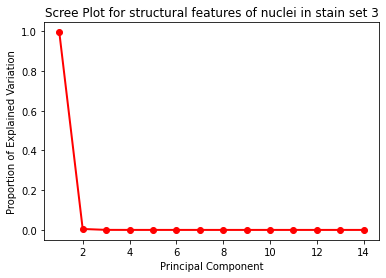

Explained variation of the first component: 0.9949555556230905


In [176]:
nuclei_structural_3 = stain3.loc[:, "Nuclei_CP_AreaShape_Area":"Nuclei_CP_AreaShape_Solidity"]
c = nuclei_structural_3.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_structural_3)
projected_nuclei_structural_3 = pca.transform(nuclei_structural_3)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for structural features of nuclei in stain set 3')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[0])

### Textural features of nuclei

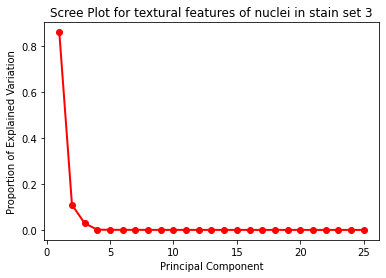

Explained variation of the first component: [8.59074757e-01 1.09376556e-01 2.87491695e-02 1.12545018e-03
 4.58671672e-04]


In [177]:
nuclei_textural_3 = stain3.loc[:,"Nuclei_CP_Texture_AngularSecondMoment_Fibrillarin_3_0": "Nuclei_CP_Texture_Variance_Fibrillarin_3_90" ]
c = nuclei_textural_3.shape[1]-1
pca = PCA(n_components= c, svd_solver='full')
pca.fit(nuclei_textural_3)
projected_nuclei_textural_3 = pca.transform(nuclei_textural_3)[:, 0].flatten()
plt.plot(np.linspace(1,c,c), pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot for textural features of nuclei in stain set 3')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variation')
plt.show()
print("Explained variation of the first component:", pca.explained_variance_ratio_[:5])

### Stainset 3 with threee variables 

In [180]:
df3 = pd.DataFrame(np.array([ projected_nuclei_structural_3, projected_nuclei_textural_3, stain3["Spot_PA_SpotCellCount"].values])).T
df3.columns = ['nuclei_structure', "nuclei_textural",'cell_count']
df3.corr(method = "spearman")

,nuclei_structure,nuclei_textural,cell_count
0,513.108773,0.334724,81.0
1,48.566925,0.446305,516.0
2,20.540976,0.346220,481.0
3,159.814222,-0.126905,375.0
4,376.978648,-0.320574,287.0


In [246]:
df3["ECMp"] = stain3["ECMp"].values
df3["Ligand1"] = stain3["Ligand1"].values

## Two Sample Tests

### Cell Count

In [253]:
print(stats.anderson_ksamp([df1["cell_count"], df2["cell_count"]]))
print(stats.anderson_ksamp([df1["cell_count"], df3["cell_count"]]))
print(stats.anderson_ksamp([df2["cell_count"], df3["cell_count"]]))

Anderson_ksampResult(statistic=33724.36098275931, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Anderson_ksampResult(statistic=37580.531223117396, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)
Anderson_ksampResult(statistic=31708.702844502066, critical_values=array([0.325, 1.226, 1.961, 2.718, 3.752, 4.592, 6.546]), significance_level=0.001)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: p-value floored: true value smaller than 0.001
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: p-value floored: true value smaller than 0.001
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: p-value floored: true value smaller than 0.001
  This is separate from the ipykernel package so we can avoid doing imports until


### Cell Structural

In [256]:
print(stats.kstest(df1["cell_structure"], df2["cell_structure"]))

KstestResult(statistic=0.4519106503714688, pvalue=0.0)


### Cytoplasm Structure

In [257]:
print(stats.kstest(df1["cytoplasm_structure"], df2["cytoplasm_structure"]))

KstestResult(statistic=0.5857101414834666, pvalue=0.0)


### Nuclei Structure

In [259]:
print(stats.kstest(df1["nuclei_structure"], df2["nuclei_structure"]))
print(stats.kstest(df1["nuclei_structure"], df3["nuclei_structure"]))
print(stats.kstest(df2["nuclei_structure"], df3["nuclei_structure"]))

KstestResult(statistic=0.2120018348499222, pvalue=0.0)
KstestResult(statistic=0.15638960500945273, pvalue=0.0)
KstestResult(statistic=0.05686563283664008, pvalue=3.0475965115332716e-63)
